In [1]:
import pandas as pd

In [2]:
cols=['user_id','item_id','rating']

In [3]:
coat_obs = pd.read_csv('../data/yahoo_observed/train012.txt', sep='\t',names=cols, encoding='latin-1')

In [4]:
coat_obs.head()

,user_id,item_id,rating
0,29969742,46822571,2
1,29960317,60797755,2
2,25003764,74215323,1
3,32070389,78468571,2
4,30125175,17605922,0


In [5]:
coat_obs.item_id.nunique()

1034

In [6]:
num_items = coat_obs.item_id.nunique()
print(num_items) #p(i)

1034


In [7]:
def num_ratings_peritem(train, item):
    return train.loc[train.item_id == item].rating.count() #P(train,i)

In [8]:
def popularity(p_train_i, p_i):
    return (p_train_i/p_i)

In [9]:
def odds(p_train_i, p_i):
    p = popularity(p_train_i, p_i)
    return p/(1-p)

In [45]:
def p_relevance(train, item):
    ratings_item=train.loc[train.item_id == item].rating
    non_rel = ratings_item[ratings_item <1].count() #this is not a probability tho
    rel = ratings_item[ratings_item >=1].count() #this is not a probability tho
    return rel, non_rel #p(rel,train,i) p(non_rel,train,i)

In [11]:
def p_average(p_rel_train_i, p_non_rel_train_i, p_train_i):
    return (p_rel_train_i/p_train_i), (p_non_rel_train_i/p_train_i)

In [12]:
def delta(fa, fb):
    return abs(fa - fb)

In [13]:
def steepness(fa, fb):
    return delta(fa,fb)/max(fa,fb)

In [66]:
num_items = 1034
main_set = list(range(0,num_items))
result=[]
for i in main_set:
    sub_set = main_set.copy()
    sub_set.remove(i)
    for j in sub_set:
        result.append([i,j])
r=pd.DataFrame(result)
r.columns = ['a','b']
print (r.head())   

   a  b
0  0  1
1  0  2
2  0  3
3  0  4
4  0  5


In [65]:
r.head()

,a,b
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [33]:
o = coat_obs.groupby('item_id').rating.count().reset_index().reset_index()
print(o)

      index   item_id  rating
0         0    526229       4
1         1    536440      57
2         2    585200       8
3         3    774905       8
4         4    861187      24
...     ...       ...     ...
1029   1029  98104668      14
1030   1030  98400694       4
1031   1031  99107038       3
1032   1032  99677218       9
1033   1033  99757138       1

[1034 rows x 3 columns]


In [35]:
for i in o['index']:
    o.at[i,'odds']=odds(o.at[i,'rating'], num_items)

In [36]:
o.loc[o['index']==0]

,index,item_id,rating,odds
0,0,526229,4,0.003883


In [56]:
o.loc[0,'item_id']

526229

In [54]:
o.item_id.loc[o['index']==0]

0    526229
Name: item_id, dtype: int64

In [58]:
for i in o['index']:
    j = o.loc[i,'item_id']
    rele=p_relevance(coat_obs, j)
    o.at[i,'relevant'] = rele[0]
    o.at[i,'non_relevant'] = rele[1]

In [59]:
o.loc[o['index']==0]

,index,item_id,rating,odds,relevant,non_relevant
0,0,526229,4,0.003883,1.0,3.0


In [61]:
for i in o['index']:
    ave=p_average(o.at[i,'relevant'], o.at[i,'non_relevant'], o.at[i,'rating'])
    o.at[i,'average_rel'] = ave[0]
    o.at[i,'average_non_rel'] = ave[1]

In [62]:
o.loc[o['index']==0]

,index,item_id,rating,odds,relevant,non_relevant,average_rel,average_non_rel
0,0,526229,4,0.003883,1.0,3.0,0.25,0.75


In [67]:
r.loc[r['a']==0]

,a,b
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
1028,0,1029
1029,0,1030
1030,0,1031
1031,0,1032


In [71]:
merged=pd.merge(r,o,left_on='a',right_on='index') #merge with 1st item (a), didn't need to use outer join
print(merged.head())

   a  b  index  item_id  rating      odds  relevant  non_relevant  \
0  0  1      0   526229       4  0.003883       1.0           3.0   
1  0  2      0   526229       4  0.003883       1.0           3.0   
2  0  3      0   526229       4  0.003883       1.0           3.0   
3  0  4      0   526229       4  0.003883       1.0           3.0   
4  0  5      0   526229       4  0.003883       1.0           3.0   

   average_rel  average_non_rel  
0         0.25             0.75  
1         0.25             0.75  
2         0.25             0.75  
3         0.25             0.75  
4         0.25             0.75  


In [72]:
merged.loc[merged['a']==0]

,a,b,index,item_id,rating,odds,relevant,non_relevant,average_rel,average_non_rel
0,0,1,0,526229,4,0.003883,1.0,3.0,0.25,0.75
1,0,2,0,526229,4,0.003883,1.0,3.0,0.25,0.75
2,0,3,0,526229,4,0.003883,1.0,3.0,0.25,0.75
3,0,4,0,526229,4,0.003883,1.0,3.0,0.25,0.75
4,0,5,0,526229,4,0.003883,1.0,3.0,0.25,0.75
...,...,...,...,...,...,...,...,...,...,...
1028,0,1029,0,526229,4,0.003883,1.0,3.0,0.25,0.75
1029,0,1030,0,526229,4,0.003883,1.0,3.0,0.25,0.75
1030,0,1031,0,526229,4,0.003883,1.0,3.0,0.25,0.75
1031,0,1032,0,526229,4,0.003883,1.0,3.0,0.25,0.75


In [73]:
merged2=pd.merge(merged,o,left_on='b',right_on='index') #merge also with item b
print(merged2.head())

   a  b  index_x  item_id_x  rating_x    odds_x  relevant_x  non_relevant_x  \
0  0  1        0     526229         4  0.003883         1.0             3.0   
1  2  1        2     585200         8  0.007797         7.0             1.0   
2  3  1        3     774905         8  0.007797         4.0             4.0   
3  4  1        4     861187        24  0.023762        18.0             6.0   
4  5  1        5     891436        13  0.012733         7.0             6.0   

   average_rel_x  average_non_rel_x  index_y  item_id_y  rating_y    odds_y  \
0       0.250000           0.750000        1     536440        57  0.058342   
1       0.875000           0.125000        1     536440        57  0.058342   
2       0.500000           0.500000        1     536440        57  0.058342   
3       0.750000           0.250000        1     536440        57  0.058342   
4       0.538462           0.461538        1     536440        57  0.058342   

   relevant_y  non_relevant_y  average_rel_y  aver

In [74]:
merged2.loc[merged2['a']==0]

,a,b,index_x,item_id_x,rating_x,odds_x,relevant_x,non_relevant_x,average_rel_x,average_non_rel_x,index_y,item_id_y,rating_y,odds_y,relevant_y,non_relevant_y,average_rel_y,average_non_rel_y
0,0,1,0,526229,4,0.003883,1.0,3.0,0.25,0.75,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246
1033,0,2,0,526229,4,0.003883,1.0,3.0,0.25,0.75,2,585200,8,0.007797,7.0,1.0,0.875000,0.125000
2066,0,3,0,526229,4,0.003883,1.0,3.0,0.25,0.75,3,774905,8,0.007797,4.0,4.0,0.500000,0.500000
3099,0,4,0,526229,4,0.003883,1.0,3.0,0.25,0.75,4,861187,24,0.023762,18.0,6.0,0.750000,0.250000
4132,0,5,0,526229,4,0.003883,1.0,3.0,0.25,0.75,5,891436,13,0.012733,7.0,6.0,0.538462,0.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061924,0,1029,0,526229,4,0.003883,1.0,3.0,0.25,0.75,1029,98104668,14,0.013725,11.0,3.0,0.785714,0.214286
1062957,0,1030,0,526229,4,0.003883,1.0,3.0,0.25,0.75,1030,98400694,4,0.003883,3.0,1.0,0.750000,0.250000
1063990,0,1031,0,526229,4,0.003883,1.0,3.0,0.25,0.75,1031,99107038,3,0.002910,1.0,2.0,0.333333,0.666667
1065023,0,1032,0,526229,4,0.003883,1.0,3.0,0.25,0.75,1032,99677218,9,0.008780,6.0,3.0,0.666667,0.333333


In [76]:
merged2.loc[merged2['b']==1]

,a,b,index_x,item_id_x,rating_x,odds_x,relevant_x,non_relevant_x,average_rel_x,average_non_rel_x,index_y,item_id_y,rating_y,odds_y,relevant_y,non_relevant_y,average_rel_y,average_non_rel_y
0,0,1,0,526229,4,0.003883,1.0,3.0,0.250000,0.750000,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246
1,2,1,2,585200,8,0.007797,7.0,1.0,0.875000,0.125000,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246
2,3,1,3,774905,8,0.007797,4.0,4.0,0.500000,0.500000,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246
3,4,1,4,861187,24,0.023762,18.0,6.0,0.750000,0.250000,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246
4,5,1,5,891436,13,0.012733,7.0,6.0,0.538462,0.461538,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1029,1,1029,98104668,14,0.013725,11.0,3.0,0.785714,0.214286,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246
1029,1030,1,1030,98400694,4,0.003883,3.0,1.0,0.750000,0.250000,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246
1030,1031,1,1031,99107038,3,0.002910,1.0,2.0,0.333333,0.666667,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246
1031,1032,1,1032,99677218,9,0.008780,6.0,3.0,0.666667,0.333333,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246


finally compute steepness

In [77]:
merged2.head()

,a,b,index_x,item_id_x,rating_x,odds_x,relevant_x,non_relevant_x,average_rel_x,average_non_rel_x,index_y,item_id_y,rating_y,odds_y,relevant_y,non_relevant_y,average_rel_y,average_non_rel_y
0,0,1,0,526229,4,0.003883,1.0,3.0,0.250000,0.750000,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246
1,2,1,2,585200,8,0.007797,7.0,1.0,0.875000,0.125000,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246
2,3,1,3,774905,8,0.007797,4.0,4.0,0.500000,0.500000,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246
3,4,1,4,861187,24,0.023762,18.0,6.0,0.750000,0.250000,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246
4,5,1,5,891436,13,0.012733,7.0,6.0,0.538462,0.461538,1,536440,57,0.058342,40.0,17.0,0.701754,0.298246


In [78]:
abs(merged2['odds_x'] - merged2['odds_y'])

0          0.054458
1          0.050545
2          0.050545
3          0.034579
4          0.045609
             ...   
1068117    0.009842
1068118    0.000000
1068119    0.000974
1068120    0.004897
1068121    0.002915
Length: 1068122, dtype: float64

In [79]:
merged2[['odds_x', 'odds_y']].max(axis=1)

0          0.058342
1          0.058342
2          0.058342
3          0.058342
4          0.058342
             ...   
1068117    0.013725
1068118    0.003883
1068119    0.003883
1068120    0.008780
1068121    0.003883
Length: 1068122, dtype: float64

In [80]:
abs(merged2['odds_x'] - merged2['odds_y'])/(merged2[['odds_x', 'odds_y']].max(axis=1))

0          0.933436
1          0.866352
2          0.866352
3          0.592705
4          0.781759
             ...   
1068117    0.717060
1068118    0.000000
1068119    0.250727
1068120    0.557713
1068121    0.750726
Length: 1068122, dtype: float64

In [81]:
def steepness_cols(df, col_name):
    abs(df[col_name+'_x'] - df[col_name+'_y'])/(df[[col_name+'_x', col_name+'_y']].max(axis=1))    

In [82]:
merged2['steepness_odds'] =abs(merged2['odds_x'] - merged2['odds_y'])/(merged2[['odds_x', 'odds_y']].max(axis=1))

In [83]:
merged2['steepness_relevance'] = abs(merged2['average_rel_x'] - merged2['average_rel_y'])/(merged2[['average_rel_x', 'average_rel_y']].max(axis=1))

In [84]:
merged2['steepness_non_relevance'] = abs(merged2['average_non_rel_x'] - merged2['average_non_rel_y'])/(merged2[['average_non_rel_x', 'average_non_rel_y']].max(axis=1))

In [85]:
merged2.head()

,a,b,index_x,item_id_x,rating_x,odds_x,relevant_x,non_relevant_x,average_rel_x,average_non_rel_x,...,item_id_y,rating_y,odds_y,relevant_y,non_relevant_y,average_rel_y,average_non_rel_y,steepness_odds,steepness_relevance,steepness_non_relevance
0,0,1,0,526229,4,0.003883,1.0,3.0,0.250000,0.750000,...,536440,57,0.058342,40.0,17.0,0.701754,0.298246,0.933436,0.643750,0.602339
1,2,1,2,585200,8,0.007797,7.0,1.0,0.875000,0.125000,...,536440,57,0.058342,40.0,17.0,0.701754,0.298246,0.866352,0.197995,0.580882
2,3,1,3,774905,8,0.007797,4.0,4.0,0.500000,0.500000,...,536440,57,0.058342,40.0,17.0,0.701754,0.298246,0.866352,0.287500,0.403509
3,4,1,4,861187,24,0.023762,18.0,6.0,0.750000,0.250000,...,536440,57,0.058342,40.0,17.0,0.701754,0.298246,0.592705,0.064327,0.161765
4,5,1,5,891436,13,0.012733,7.0,6.0,0.538462,0.461538,...,536440,57,0.058342,40.0,17.0,0.701754,0.298246,0.781759,0.232692,0.353801


In [86]:
merged2['max_steepness'] = merged2[['steepness_odds','steepness_relevance','steepness_non_relevance']].max(axis=1)

In [87]:
merged2.head()

,a,b,index_x,item_id_x,rating_x,odds_x,relevant_x,non_relevant_x,average_rel_x,average_non_rel_x,...,rating_y,odds_y,relevant_y,non_relevant_y,average_rel_y,average_non_rel_y,steepness_odds,steepness_relevance,steepness_non_relevance,max_steepness
0,0,1,0,526229,4,0.003883,1.0,3.0,0.250000,0.750000,...,57,0.058342,40.0,17.0,0.701754,0.298246,0.933436,0.643750,0.602339,0.933436
1,2,1,2,585200,8,0.007797,7.0,1.0,0.875000,0.125000,...,57,0.058342,40.0,17.0,0.701754,0.298246,0.866352,0.197995,0.580882,0.866352
2,3,1,3,774905,8,0.007797,4.0,4.0,0.500000,0.500000,...,57,0.058342,40.0,17.0,0.701754,0.298246,0.866352,0.287500,0.403509,0.866352
3,4,1,4,861187,24,0.023762,18.0,6.0,0.750000,0.250000,...,57,0.058342,40.0,17.0,0.701754,0.298246,0.592705,0.064327,0.161765,0.592705
4,5,1,5,891436,13,0.012733,7.0,6.0,0.538462,0.461538,...,57,0.058342,40.0,17.0,0.701754,0.298246,0.781759,0.232692,0.353801,0.781759


In [88]:
import numpy as np

In [89]:
merged2['max_steepness_label'] = np.where(merged2['max_steepness'] == merged2['steepness_odds'], 'odds', np.where(merged2['max_steepness'] == merged2['steepness_relevance'], 'relevance',np.where(merged2['max_steepness'] == merged2['steepness_non_relevance'], 'non_relevance','y')))

In [90]:
merged2.head(10)

,a,b,index_x,item_id_x,rating_x,odds_x,relevant_x,non_relevant_x,average_rel_x,average_non_rel_x,...,odds_y,relevant_y,non_relevant_y,average_rel_y,average_non_rel_y,steepness_odds,steepness_relevance,steepness_non_relevance,max_steepness,max_steepness_label
0,0,1,0,526229,4,0.003883,1.0,3.0,0.250000,0.750000,...,0.058342,40.0,17.0,0.701754,0.298246,0.933436,0.643750,0.602339,0.933436,odds
1,2,1,2,585200,8,0.007797,7.0,1.0,0.875000,0.125000,...,0.058342,40.0,17.0,0.701754,0.298246,0.866352,0.197995,0.580882,0.866352,odds
2,3,1,3,774905,8,0.007797,4.0,4.0,0.500000,0.500000,...,0.058342,40.0,17.0,0.701754,0.298246,0.866352,0.287500,0.403509,0.866352,odds
3,4,1,4,861187,24,0.023762,18.0,6.0,0.750000,0.250000,...,0.058342,40.0,17.0,0.701754,0.298246,0.592705,0.064327,0.161765,0.592705,odds
4,5,1,5,891436,13,0.012733,7.0,6.0,0.538462,0.461538,...,0.058342,40.0,17.0,0.701754,0.298246,0.781759,0.232692,0.353801,0.781759,odds
5,6,1,6,936457,3,0.002910,2.0,1.0,0.666667,0.333333,...,0.058342,40.0,17.0,0.701754,0.298246,0.950125,0.050000,0.105263,0.950125,odds
6,7,1,7,1118030,6,0.005837,4.0,2.0,0.666667,0.333333,...,0.058342,40.0,17.0,0.701754,0.298246,0.899959,0.050000,0.105263,0.899959,odds
7,8,1,8,1125208,4,0.003883,1.0,3.0,0.250000,0.750000,...,0.058342,40.0,17.0,0.701754,0.298246,0.933436,0.643750,0.602339,0.933436,odds
8,9,1,9,1209016,19,0.018719,14.0,5.0,0.736842,0.263158,...,0.058342,40.0,17.0,0.701754,0.298246,0.679146,0.047619,0.117647,0.679146,odds
9,10,1,10,1286176,3,0.002910,2.0,1.0,0.666667,0.333333,...,0.058342,40.0,17.0,0.701754,0.298246,0.950125,0.050000,0.105263,0.950125,odds


In [93]:
merged2['max_steep_odds_rel'] = merged2[['steepness_odds','steepness_relevance']].max(axis=1)

In [94]:
merged2['max_steep_odds_non_rel'] = merged2[['steepness_odds','steepness_non_relevance']].max(axis=1)

In [95]:
merged2['max_steep_rel_non_rel'] = merged2[['steepness_relevance','steepness_non_relevance']].max(axis=1)

In [97]:
merged2['max_steep_odds_rel_label'] = np.where(merged2['max_steep_odds_rel'] == merged2['steepness_odds'], 'odds', np.where(merged2['max_steep_odds_rel'] == merged2['steepness_relevance'], 'relevance', 'y'))

In [98]:
merged2['max_steep_odds_non_rel_label'] = np.where(merged2['max_steep_odds_non_rel'] == merged2['steepness_odds'], 'odds', np.where(merged2['max_steep_odds_non_rel'] == merged2['steepness_non_relevance'], 'non_relevance', 'y'))

In [100]:
merged2['max_steep_rel_non_rel_label'] = np.where(merged2['max_steep_rel_non_rel'] == merged2['steepness_relevance'], 'relevance', np.where(merged2['max_steep_rel_non_rel'] == merged2['steepness_non_relevance'], 'non_relevance', 'y'))

In [101]:
merged2.head(10)

,a,b,index_x,item_id_x,rating_x,odds_x,relevant_x,non_relevant_x,average_rel_x,average_non_rel_x,...,steepness_relevance,steepness_non_relevance,max_steepness,max_steepness_label,max_steep_odds_rel,max_steep_odds_non_rel,max_steep_rel_non_rel,max_steep_odds_rel_label,max_steep_odds_non_rel_label,max_steep_rel_non_rel_label
0,0,1,0,526229,4,0.003883,1.0,3.0,0.250000,0.750000,...,0.643750,0.602339,0.933436,odds,0.933436,0.933436,0.643750,odds,odds,relevance
1,2,1,2,585200,8,0.007797,7.0,1.0,0.875000,0.125000,...,0.197995,0.580882,0.866352,odds,0.866352,0.866352,0.580882,odds,odds,non_relevance
2,3,1,3,774905,8,0.007797,4.0,4.0,0.500000,0.500000,...,0.287500,0.403509,0.866352,odds,0.866352,0.866352,0.403509,odds,odds,non_relevance
3,4,1,4,861187,24,0.023762,18.0,6.0,0.750000,0.250000,...,0.064327,0.161765,0.592705,odds,0.592705,0.592705,0.161765,odds,odds,non_relevance
4,5,1,5,891436,13,0.012733,7.0,6.0,0.538462,0.461538,...,0.232692,0.353801,0.781759,odds,0.781759,0.781759,0.353801,odds,odds,non_relevance
5,6,1,6,936457,3,0.002910,2.0,1.0,0.666667,0.333333,...,0.050000,0.105263,0.950125,odds,0.950125,0.950125,0.105263,odds,odds,non_relevance
6,7,1,7,1118030,6,0.005837,4.0,2.0,0.666667,0.333333,...,0.050000,0.105263,0.899959,odds,0.899959,0.899959,0.105263,odds,odds,non_relevance
7,8,1,8,1125208,4,0.003883,1.0,3.0,0.250000,0.750000,...,0.643750,0.602339,0.933436,odds,0.933436,0.933436,0.643750,odds,odds,relevance
8,9,1,9,1209016,19,0.018719,14.0,5.0,0.736842,0.263158,...,0.047619,0.117647,0.679146,odds,0.679146,0.679146,0.117647,odds,odds,non_relevance
9,10,1,10,1286176,3,0.002910,2.0,1.0,0.666667,0.333333,...,0.050000,0.105263,0.950125,odds,0.950125,0.950125,0.105263,odds,odds,non_relevance


In [105]:
merged2[['a','b','max_steepness_label','max_steep_odds_rel_label','max_steep_odds_non_rel_label','max_steep_rel_non_rel_label']]

,a,b,max_steepness_label,max_steep_odds_rel_label,max_steep_odds_non_rel_label,max_steep_rel_non_rel_label
0,0,1,odds,odds,odds,relevance
1,2,1,odds,odds,odds,non_relevance
2,3,1,odds,odds,odds,non_relevance
3,4,1,odds,odds,odds,non_relevance
4,5,1,odds,odds,odds,non_relevance
...,...,...,...,...,...,...
1068117,1029,0,odds,odds,odds,non_relevance
1068118,1030,0,relevance,relevance,non_relevance,relevance
1068119,1031,0,odds,odds,odds,relevance
1068120,1032,0,relevance,relevance,odds,relevance


In [91]:
import matplotlib.pyplot as plt

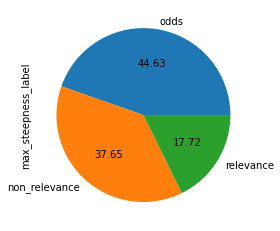

In [92]:
merged2['max_steepness_label'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

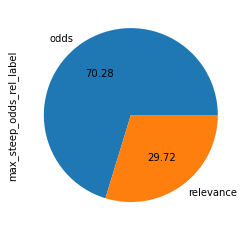

In [102]:
merged2['max_steep_odds_rel_label'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

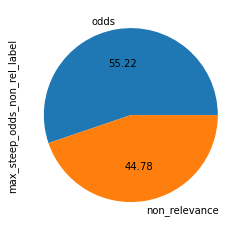

In [103]:
merged2['max_steep_odds_non_rel_label'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

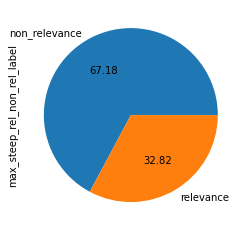

In [104]:
merged2['max_steep_rel_non_rel_label'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [107]:
merged2.to_csv('../data/cm100k_observed/steepness.txt', header=True, index=None, sep='\t', mode='w+')